In [1]:
# Importando as dependências
from QKDnet.components import Network, Controller
from QKDnet.sim import Simulation
from QKDnet.utils import Logger

# Ativar os logs:
# Logger.activate(Logger)

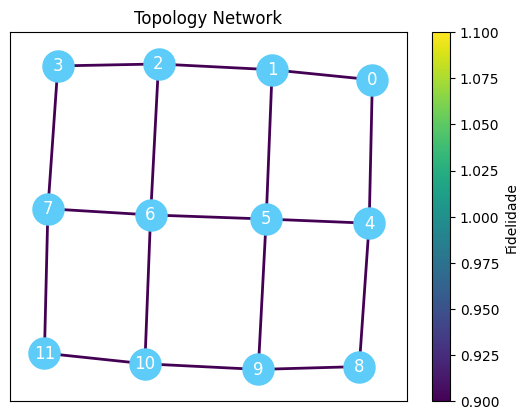

In [2]:
# Rede
rede = Network()
rede.set_topology("Lattice", 3,4)
rede.set_nqubits(1000)
rede.draw()
# Controlador
controlador = Controller(rede)

In [3]:
# Parâmetros da simulação
n_requests = 1000
capabilities = [1, 2, 3, 4, 5, 10, 15, 20, 25, 50, 100]
apps_distribution = [0.33, 0.33, 0.33]
max_time_request = 10
simulation_case = 1

In [4]:
# Simulações
simulations = []

for c in capabilities:
    sim = Simulation(rede, controlador)
    sim.set_case(simulation_case)
    sim.set_apps_distribution(apps_distribution)
    sim.set_max_time_request(max_time_request)
    sim.set_n_requests(n_requests)
    # Alterando a capacidade
    sim.network.set_capacity(c)
    # Rodando a simulação
    sim.run()
    # Guardando a simulação
    simulations.append(sim)
    

In [5]:
for simulation in simulations:
    print(simulation.throughput)

0.041
0.063
0.09066666666666667
0.114
0.1428
0.23183333333333334
0.3304285714285714
0.414125
0.4792222222222222
0.5313
0.5739090909090909
